Here, we explore unsupervised learning algorithms, namely k-means and principal component analysis (PCA). K-means is a popular algorithm for clustering, whereas PCA is commonly used for dimensionality reduction

**Loading modules**

In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fnt
import seaborn as sns

**Loading data**

In [ ]:
data = pd.read_csv("./data/jhc.solut.csv")
data.head()

,X,Y,Z,HeatRelease,ZBilger,Y_H2O,Y_H2,Y_CO2,Y_CO,Y_OH,...,T_AVG,T_RMS,Y_CH4_AVG,Y_CH4_RMS,CV_RANK,U-X,U-Y,U-Z,X_D,R_D
0,-7.700000e-34,-0.015,0,0,3.570000e-08,0.131528,1.520000e-07,3.200000e-32,-3.800000e-30,0.000041,...,0,0,0,0,2.0,4.07035,0.320967,-0.002271,0.000000,-10.0
1,1.503010e-04,-0.015,0,0,3.520000e-08,0.131527,1.500000e-07,3.880000e-32,-4.680000e-30,0.000042,...,0,0,0,0,2.0,4.07418,0.330222,-0.002959,0.100200,-10.0
2,3.006010e-04,-0.015,0,0,3.480000e-08,0.131527,1.490000e-07,4.280000e-32,-5.450000e-30,0.000042,...,0,0,0,0,2.0,4.08453,0.341255,-0.004008,0.200401,-10.0
3,4.509020e-04,-0.015,0,0,3.440000e-08,0.131527,1.470000e-07,4.500000e-32,-6.320000e-30,0.000043,...,0,0,0,0,2.0,4.10716,0.356926,-0.005325,0.300601,-10.0
4,6.012020e-04,-0.015,0,0,3.410000e-08,0.131527,1.460000e-07,4.420000e-32,-7.290000e-30,0.000044,...,0,0,0,0,2.0,4.12944,0.376804,-0.006632,0.400802,-10.0


We visualize some flowfields from the data

Text(0.5, 1.0, '$Y_{CO2}$ [-]')

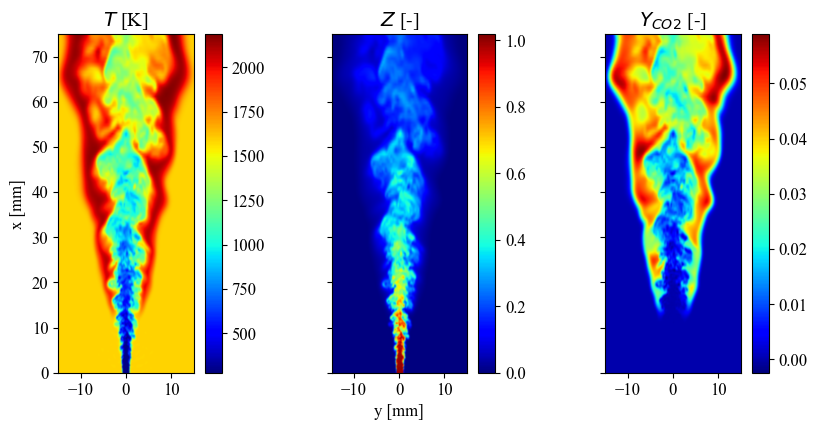

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(10, 4.4), sharey=True)
temp_plot = axs[0].imshow(np.array(data['T']).reshape(200,500).T, extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],interpolation='bicubic', cmap='jet',origin='lower')
fig.colorbar(temp_plot, ax=axs[0])
axs[0].set_title(r'$T$ [K]')
axs[0].set_ylabel('x [mm]')
axs[1].set_xlabel('y [mm]')
z_plot = axs[1].imshow(np.array(data['ZBilger']).reshape(200,500).T, extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],interpolation='bicubic', cmap='jet',origin='lower')

fig.colorbar(z_plot, ax=axs[1])
axs[1].set_title(r'$Z$ [-]')

co2_plot= axs[2].imshow(np.array(data['Y_CO2']).reshape(200,500).T, extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000],interpolation='bicubic', cmap='jet',origin='lower')
fig.colorbar(co2_plot, ax=axs[2])
axs[2].set_title(r'$Y_{CO2}$ [-]')


Then we normalize the raw data as a pre-processing step

In [12]:
X = data[['ZBilger', 'Y_CH4', 'Y_CO2' ,'Y_CO', 'Y_O2', 'Y_H2O', 'T']].copy()
X_scaled = StandardScaler().fit_transform(X.values)

**K-means Clustering**

We initialize the k-means clustering algorithm for several cluster sizes.

In [13]:
km2 = KMeans(
    n_clusters=2, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km3 = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km4 = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km5 = KMeans(
    n_clusters=5, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
km6 = KMeans(
    n_clusters=6, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)

Then we apply k-means on the normalized dataset

In [8]:
y_km2 = km2.fit_predict(X_scaled)
y_km3 = km3.fit_predict(X_scaled)
y_km4 = km4.fit_predict(X_scaled)
y_km5 = km5.fit_predict(X_scaled)
y_km6 = km6.fit_predict(X_scaled)

And we visualize the results.

Text(0.5, 0, 'y [mm]')

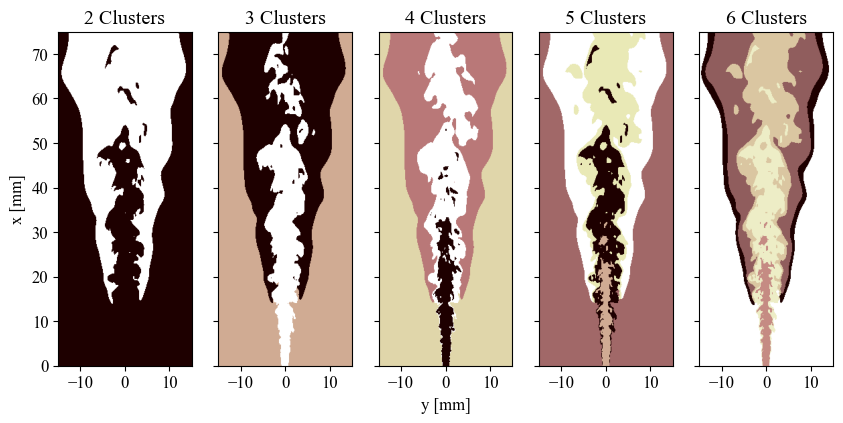

In [14]:

fig, axs = plt.subplots(1, 5, figsize=(10, 4.4), sharey=True)

axs[0].imshow(y_km2.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[0].set_title('2 Clusters')

axs[1].imshow(y_km3.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[1].set_title('3 Clusters')

axs[2].imshow(y_km4.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[2].set_title('4 Clusters')

axs[3].imshow(y_km5.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[3].set_title('5 Clusters')

axs[4].imshow(y_km6.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[4].set_title('6 Clusters')

axs[0].set_ylabel('x [mm]')
axs[2].set_xlabel('y [mm]')

K-means is able to detect several interesting flow features. Such as the reaction zone (after 5 clusters) and the non-reacting region (after 3 clusters)

**PCA**

Next we examine PCA. First, we initialize and then we apply PCA for to reduce the data to 2 components

In [10]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_scaled)

We plot the PCA weights

C:\Users\aming\AppData\Local\Temp\ipykernel_30048\68827512.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pca.components_[i], x=labels,
C:\Users\aming\AppData\Local\Temp\ipykernel_30048\68827512.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=pca.components_[i], x=labels,


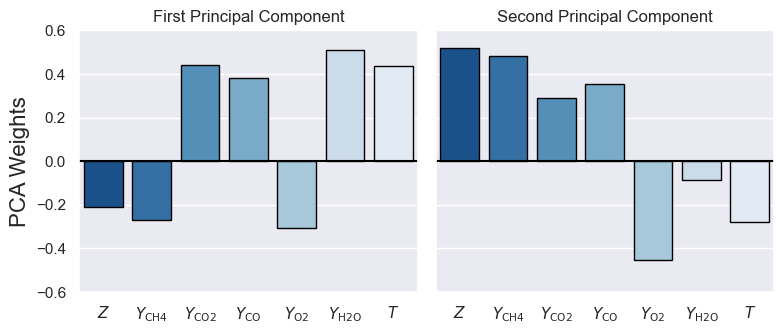

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.rcParams.update({
    "text.usetex": False,        
    "font.family": "Times New Roman"
})

# Variable labels 
labels = [r'$Z$', r'$Y_{\mathrm{CH4}}$', r'$Y_{\mathrm{CO2}}$',
          r'$Y_{\mathrm{CO}}$', r'$Y_{\mathrm{O2}}$', 
          r'$Y_{\mathrm{H2O}}$', r'$T$']

# Colors
palette = sns.color_palette("Blues_r", 7)
sns.set(style="darkgrid")

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 3.5), sharey=True)

# Titles for components
titles = ["First Principal Component", "Second Principal Component"]

# Plot each component
for i, ax in enumerate(axs):
    sns.barplot(y=pca.components_[i], x=labels,
                palette=palette, ax=ax, edgecolor='black')
    ax.axhline(0, color='black')
    ax.set_title(titles[i])

# Adjust y-limits, labels
axs[0].set_ylim([-0.6, 0.6])
axs[0].set_ylabel(r"PCA Weights", fontsize=16)

plt.tight_layout()
plt.show()


The first principal component is heavily weighted in the negative direction with combustion products and temperature. The intermediate and complete combustion products correspond with clusters where the first principal component is negative. The second principal component is heavily weighted in the positive direction with mixture fraction and CH4
, and in the negative direction with O2
 and temperature.

Next, we demontrate how dimensionality reduction via PCA can be used for easier visualization.

First, we apply kmeans on the reduced data

In [29]:
y_pca_km2 = km2.fit_predict(principalComponents)
y_pca_km3 = km3.fit_predict(principalComponents)
y_pca_km4 = km4.fit_predict(principalComponents)
y_pca_km5 = km5.fit_predict(principalComponents)
y_pca_km6 = km6.fit_predict(principalComponents)

Then we plot the data in the reduced dimension space

Text(0, 0.5, 'Second Principal Component')

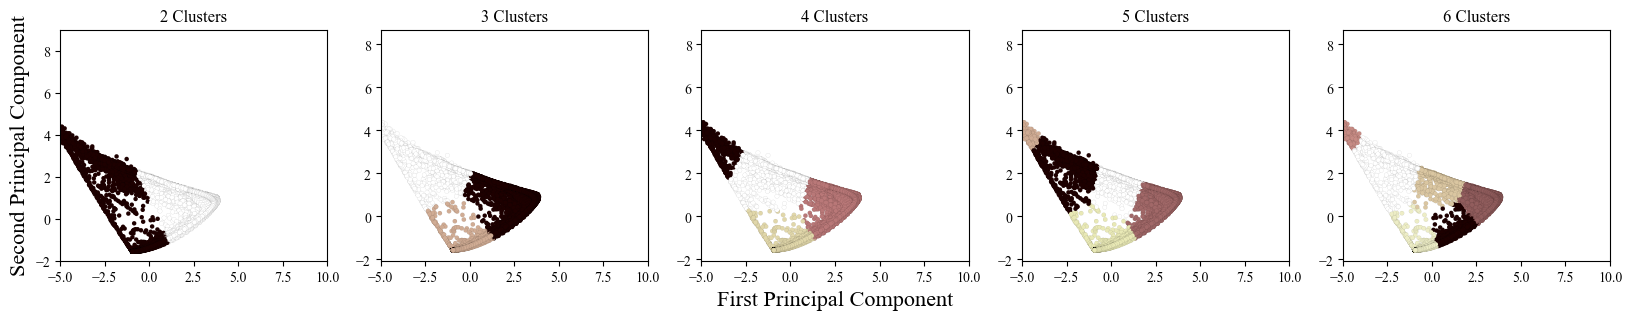

In [33]:
f, axs = plt.subplots(1, 5, figsize=(20, 3), sharex=True)

axs[0].scatter(principalComponents[:,0][::5],principalComponents[:,1][::5],c=y_pca_km2[::5],
                s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[0].set_title('2 Clusters')
axs[1].scatter(principalComponents[:,0][::5],principalComponents[:,1][::5],c=y_pca_km3[::5],s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[1].set_title('3 Clusters')
axs[2].scatter(principalComponents[:,0][::5],principalComponents[:,1][::5],c=y_pca_km4[::5],s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[2].set_title('4 Clusters')
axs[3].scatter(principalComponents[:,0][::5],principalComponents[:,1][::5],c=y_pca_km5[::5],s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[3].set_title('5 Clusters')
axs[4].scatter(principalComponents[:,0][::5],principalComponents[:,1][::5],c=y_pca_km6[::5],s = 10 , cmap = 'pink',edgecolor='black', linewidth = 0.03)
axs[4].set_title('6 Clusters')



axs[0].set_ylim([-2, 9]) 
axs[0].set_xlim([-5, 10]) 
axs[2].set_xlabel("First Principal Component", fontsize=16)
axs[0].set_ylabel("Second Principal Component", fontsize=16)

And we plot the corresponding clusters in physical space

Text(0.5, 0, 'y [mm]')

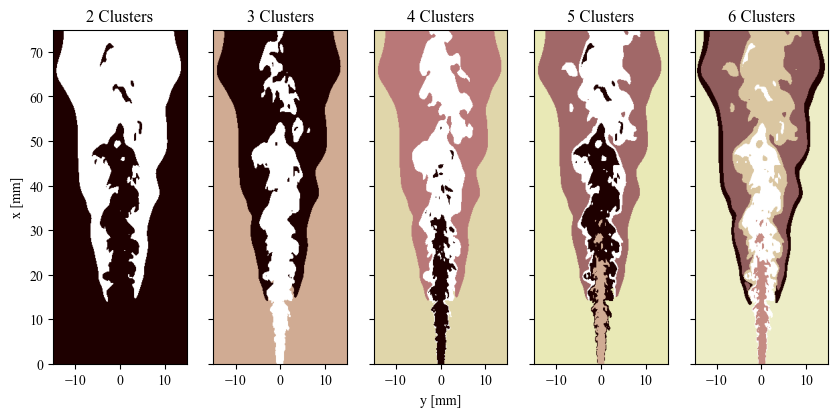

In [32]:
matplotlib.style.use('default') 
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Times New Roman"})

fig, axs = plt.subplots(1, 5, figsize=(10, 4.4), sharey=True)

axs[0].imshow(y_pca_km2.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[0].set_title('2 Clusters')
axs[1].imshow(y_pca_km3.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[1].set_title('3 Clusters')
axs[2].imshow(y_pca_km4.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[2].set_title('4 Clusters')
axs[3].imshow(y_pca_km5.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[3].set_title('5 Clusters')
axs[4].imshow(y_pca_km6.reshape(200,500).T,origin='lower',cmap='pink',extent = [min(data.Y)*1000 , max(data.Y)*1000,min(data.X)*1000 , max(data.X)*1000])
axs[4].set_title('6 Clusters')
axs[0].set_ylabel('x [mm]')
axs[2].set_xlabel('y [mm]')

Here we can see that regions that share similar physical and chemical properties are plotted close together in the reduced dimension space